**Assignment Code: DA-AG-0010**
#**Bagging & Boosting KNN & Stacking**

##**Question 1 : What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?**

**Answer:**

**Ensemble Techniques**  
The fundamental idea behind ensemble techniques is to combine multiple models to improve the overall performance, robustness, and generalizability of predictions. By aggregating the outputs of several models, ensemble methods often achieve better results than individual models.

###**Bagging vs Boosting**  
**Bagging (Bootstrap Aggregating)**
- **Approach:** Creates multiple subsets of data (with replacement), trains a model on each, and averages the results.
- **Objective:** Reduce variance, improve stability.   
**Example:** Random Forest.

**Boosting**  
- **Approach:** Sequentially trains models, focusing on correcting errors made by previous models.
- **Objective:** Reduce bias, improve accuracy.   **Example:** AdaBoost, Gradient Boosting.



##**Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.**

**Answer:**

The Random Forest Classifier reduces overfitting compared to a single decision tree primarily through two mechanisms: **bagging (bootstrap aggregating)** and **random feature selection**.

1.  **Bagging:** Random Forest builds multiple decision trees on different bootstrap samples (random subsets with replacement) of the training data. Each individual tree might still overfit to its specific subset, but by averaging or voting the predictions of many such trees, the collective prediction becomes more robust and less sensitive to the noise and peculiarities of any single training subset. This averaging effect reduces the overall variance of the model, which is a key factor in overfitting.

2.  **Random Feature Selection:** When building each individual decision tree within the Random Forest, at each split point, only a random subset of features is considered. This means that even if some features are highly predictive and could lead a single tree to overfit by relying too heavily on them, the Random Forest is less likely to do so because each tree is forced to consider different combinations of features. This adds another layer of randomness and decorrelates the trees, further reducing variance and preventing overfitting.

Two key hyperparameters that play a significant role in this process are:

1.  **`n_estimators`**: This hyperparameter controls the number of trees in the forest. Increasing the number of trees generally improves the performance and reduces overfitting by strengthening the averaging/voting effect. However, beyond a certain point, the improvements diminish, and computation time increases.

2.  **`max_features`**: This hyperparameter determines the number of features to consider when looking for the best split at each node in a decision tree. A smaller value of `max_features` increases the randomness and decorrelation among the trees, helping to reduce overfitting. Common values are the square root of the total number of features for classification tasks and the total number of features for regression tasks.

By combining the predictions of multiple decorrelated trees trained on different data subsets and random feature subsets, Random Forest creates a more generalized and less overfitted model than a single decision tree.

##**Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.**

**Answer:**

**Stacking (Stacked Generalization)**

Stacking is an ensemble learning technique where multiple diverse models (called base models) are trained on the training data, and then a meta-model (or blender) is trained on the predictions of these base models. The meta-model learns to combine the predictions of the base models to make a final prediction.

**Difference from Bagging/Boosting:**

*   **Hierarchy:** Stacking has a hierarchical structure. Base models are trained first, and then a separate meta-model is trained on their outputs. Bagging and boosting typically use the same type of model or focus on sequential training with error correction.
*   **Diversity:** Stacking explicitly encourages using diverse base models (e.g., a linear model, a tree-based model, a support vector machine) to capture different aspects of the data. Bagging often uses the same model type (e.g., multiple decision trees in Random Forest), and boosting sequentially builds models to improve on previous ones.
*   **Learning to Combine:** Stacking trains a meta-model to learn the optimal way to combine the predictions of the base models. Bagging typically uses simple aggregation methods like averaging or voting, while boosting combines models based on their performance in correcting errors.

**Simple Example Use Case:**

Imagine you are building a model to predict house prices. You could use stacking with the following approach:

1.  **Base Models:** Train a Linear Regression model, a Decision Tree Regressor, and a Gradient Boosting Regressor on your housing data.
2.  **Meta-Model Training Data:** Use the predictions of these three base models on the *training* data as features for your meta-model. The target variable for the meta-model would be the actual house prices from the training data.
3.  **Meta-Model:** Train a simple Linear Regression model (or another model like Ridge or Lasso) on the predictions of the base models. This meta-model learns how to best combine the predictions of the Linear Regression, Decision Tree, and Gradient Boosting models to predict the final house price.
4.  **Prediction:** When predicting on *new* unseen data, first get predictions from the base models. Then, use these predictions as input to the trained meta-model to get the final stacked prediction for the house price.

This stacked approach can often yield better results than any single base model by leveraging the strengths of different model types and learning an intelligent way to combine their outputs.

##**Question 4:What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?**

**Answer:**

The **Out-of-Bag (OOB) Score** in Random Forest is a method of estimating the model's performance during training without the need for a separate validation set. Here's how it works and why it's useful:

**What is the OOB Score?**

In Random Forest, each decision tree is trained on a bootstrap sample of the training data (a random subset with replacement). This means that for each tree, there will be some data points from the original training set that were *not* included in the bootstrap sample used to train that specific tree. These data points are called "out-of-bag" (OOB) samples for that particular tree.

The OOB score for the entire Random Forest is calculated by making predictions for each data point in the original training set using *only* the trees for which that data point was an OOB sample. For a given data point, the OOB prediction is the aggregated prediction (e.g., majority vote for classification, average for regression) from all the trees where that data point was OOB. The OOB score is then the accuracy (or other relevant metric like R-squared for regression) of these OOB predictions compared to the true target values of the training data.

**Why is it Useful?**

The OOB score is useful for several reasons:

*   **Internal Validation:** It provides an internal estimate of the model's generalization performance during the training process. It's essentially a form of cross-validation performed automatically within the Random Forest algorithm.
*   **No Need for a Separate Validation Set:** Because the OOB samples act as a built-in validation set for each tree, you don't necessarily need to split your data into a separate training and validation set to get a performance estimate. This is particularly helpful when dealing with smaller datasets where splitting off a validation set would significantly reduce the amount of data available for training.
*   **Computational Efficiency:** Calculating the OOB score is computationally efficient as it's done during the training of the trees.
*   **Hyperparameter Tuning:** The OOB score can be used to tune hyperparameters of the Random Forest, such as `n_estimators` or `max_features`, by evaluating their impact on the OOB score.

**How it Helps without a Separate Validation Set:**

By using the OOB samples for evaluation, the Random Forest algorithm can assess its performance on data it hasn't seen during the training of individual trees. This provides a reliable estimate of how well the model is likely to perform on unseen data, similar to what a separate validation set would do. The OOB score helps to detect if the model is overfitting to the training data, as a significant difference between the training accuracy and the OOB score would indicate overfitting.

In essence, the OOB score leverages the nature of the bagging process to provide a free and efficient way to estimate the generalization performance of the Random Forest model.

##**Question 5: Compare AdaBoost and Gradient Boosting in terms of:**
*   **How they handle errors from weak learners**
*   **Weight adjustment mechanism**
*   **Typical use cases**

**Answer:**

Here's a comparison between AdaBoost and Gradient Boosting:

| Feature                      | AdaBoost (Adaptive Boosting)                                  | Gradient Boosting                                               |
| :--------------------------- | :------------------------------------------------------------ | :-------------------------------------------------------------- |
| **Handling Errors**          | Focuses on misclassified samples by increasing their weights. | Focuses on the residuals (errors) of the previous predictions. |
| **Weight Adjustment**        | Adjusts sample weights in each iteration to give more emphasis to misclassified points. Also assigns weights to the weak learners based on their performance. | Does not adjust sample weights directly. Instead, it fits subsequent models to the negative gradient of the loss function (residuals). |
| **Typical Use Cases**        | Binary classification, sometimes multi-class classification. More sensitive to noisy data and outliers. | Regression and classification (both binary and multi-class). Generally more robust to noisy data and outliers than AdaBoost. Can handle more complex relationships. |

**In more detail:**

*   **How they handle errors:** AdaBoost addresses errors by making the next weak learner focus more on the data points that the current weak learner misclassified. This is done by increasing the weights of these misclassified points. Gradient Boosting, on the other hand, addresses errors by building subsequent models to predict the *residuals* (the difference between the actual value and the predicted value) of the previous model's predictions. The idea is to gradually reduce the errors.

*   **Weight adjustment mechanism:** AdaBoost explicitly adjusts the weights of the training samples in each iteration. Samples that are misclassified by a weak learner are given higher weights for the next iteration. Additionally, weak learners are assigned weights based on their accuracy, and these weights are used to combine their predictions. Gradient Boosting does not directly adjust sample weights. Instead, the learning process is guided by the negative gradient of the loss function with respect to the current prediction. Each new weak learner is trained to fit this negative gradient, effectively correcting the errors (residuals) of the ensemble so far.

*   **Typical use cases:** AdaBoost is historically strong for binary classification problems. While it can be extended to multi-class classification, it is generally more sensitive to noisy data and outliers than Gradient Boosting. Gradient Boosting is a more general and often more powerful technique that works well for both regression and classification tasks. It's generally more robust to noise and outliers and can capture more complex non-linear relationships in the data. Algorithms like Gradient Boosting Machines (GBM), XGBoost, LightGBM, and CatBoost are popular implementations of gradient boosting.

##**Question 6:Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.**

**Answer:**

CatBoost (Categorical Boosting) is designed to handle categorical features efficiently and effectively without requiring extensive preprocessing steps like one-hot encoding, which can lead to high-dimensionality and sparsity issues, especially with a large number of unique categories. CatBoost performs well on categorical features primarily due to its innovative techniques for processing them during training.

Here's a brief explanation of its handling of categorical variables:

1.  **Ordered Boosting:** CatBoost uses a permutation-driven approach called "ordered boosting" or "ordered Tikhonov regularization" during training. This technique helps to prevent target leakage, which can occur when converting categorical features into numerical features using methods that rely on the target variable (like target encoding). In ordered boosting, for each tree in the ensemble, the data is randomly permuted. The predictions for each data point are then calculated based on the trees trained on permutations of the data that do not include that specific data point. This helps to ensure that the model does not learn information about the target from the categorical feature's own value, which can lead to overfitting.

2.  **Categorical Feature Combinations:** CatBoost can automatically create combinations of categorical features. This is important because the interaction between two or more categorical features can be highly predictive, and traditional methods often require manual feature engineering to capture these interactions. CatBoost identifies useful combinations dynamically during training, reducing the need for manual creation of interaction terms.

3.  **Handling of High Cardinality Categorical Features:** For categorical features with a large number of unique values (high cardinality), CatBoost uses a form of target encoding. However, to avoid target leakage, it employs an ordered approach. When calculating the numerical representation for a specific category value, it uses the average target value of data points with that same category value from a randomly selected subset of the data *before* the current data point in the ordered permutation. This prevents the model from using the target value of the current data point itself to encode the categorical feature.



##**Question 7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization Task:**
**1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.**


In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.DataFrame(wine.target, columns=['target'])

print("Dataset loaded successfully.")
print("Features (X):")
display(X.head())
print("\nTarget (y):")
display(y.head())

Dataset loaded successfully.
Features (X):


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0



Target (y):


,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data split successfully.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Data split successfully.
X_train shape: (124, 13)
X_test shape: (54, 13)
y_train shape: (124, 1)
y_test shape: (54, 1)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train KNN without scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train.values.ravel())

# Predict on the test set
y_pred_unscaled = knn_unscaled.predict(X_test)

# Evaluate the model
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print(f"Accuracy (unscaled): {accuracy_unscaled}")

print("\nClassification Report (unscaled):")
print(classification_report(y_test, y_pred_unscaled))

Accuracy (unscaled): 0.7407407407407407

Classification Report (unscaled):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



In [ ]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaled successfully.")

Data scaled successfully.


In [ ]:
# Train KNN with best parameters from GridSearchCV on scaled data
knn_optimized = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                     metric=grid_search.best_params_['metric'])

knn_optimized.fit(X_train_scaled, y_train.values.ravel())

# Predict on the test set
y_pred_optimized = knn_optimized.predict(X_test_scaled)

# Evaluate the model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Accuracy (optimized): {accuracy_optimized}")

print("\nClassification Report (optimized):")
print(classification_report(y_test, y_pred_optimized))

Accuracy (optimized): 0.9629629629629629

Classification Report (optimized):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [ ]:
# Train KNN with scaling
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train.values.ravel())

# Predict on the test set
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate the model
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy (scaled): {accuracy_scaled}")

print("\nClassification Report (scaled):")
print(classification_report(y_test, y_pred_scaled))

Accuracy (scaled): 0.9629629629629629

Classification Report (scaled):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 21),
              'metric': ['euclidean', 'manhattan']}

# Create a KNN classifier instance
knn = KNeighborsClassifier()

# Create GridSearchCV instance
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the scaled training data
grid_search.fit(X_train_scaled, y_train.values.ravel())

# Print the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best accuracy found:", grid_search.best_score_)

Best parameters found: {'metric': 'manhattan', 'n_neighbors': 1}
Best accuracy found: 0.9753333333333334


##**Question 8 : PCA + KNN with Variance Analysis and Visualization Task:**
**1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).**

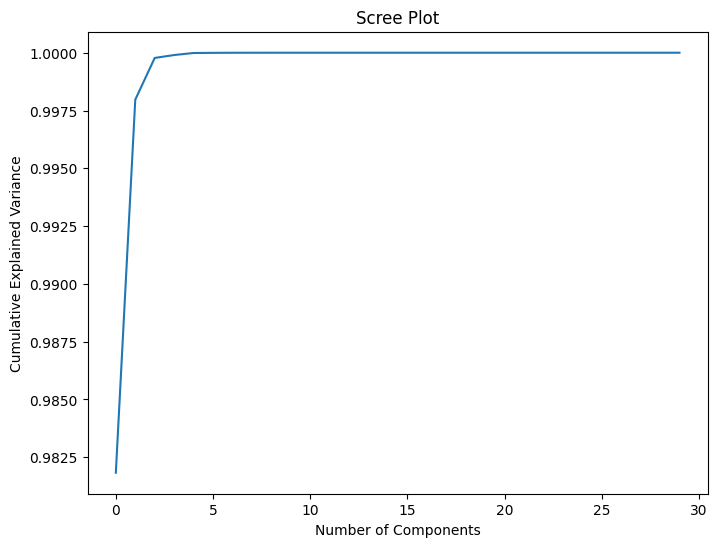

Accuracy (original data): 0.956140350877193
Accuracy (PCA-transformed data): 0.9385964912280702


Text(0.5, 1.0, 'First Two Principal Components of Breast Cancer Data')

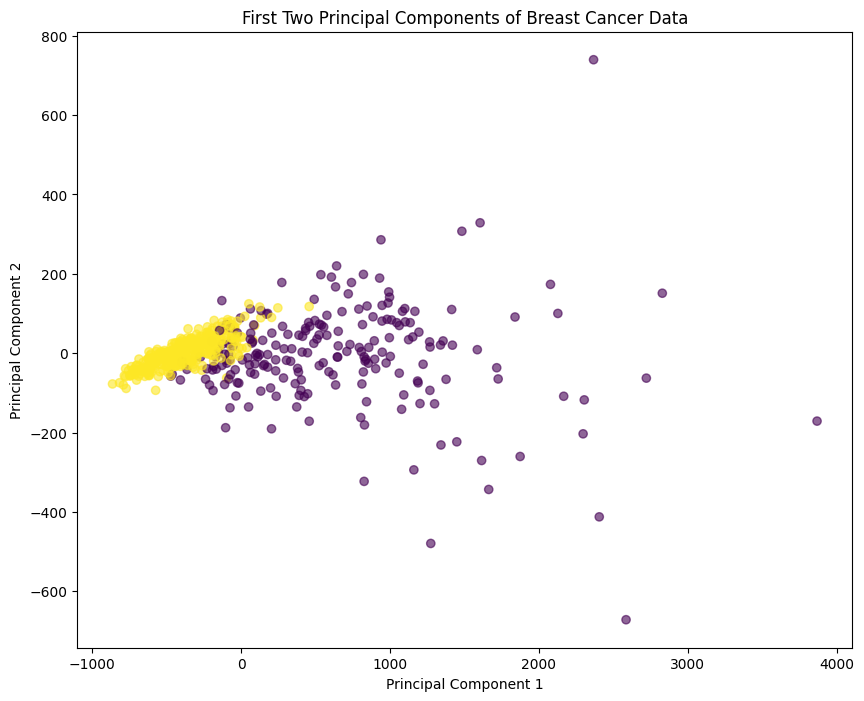

In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Breast Cancer dataset
breast_cancer_data = load_breast_cancer()
X = breast_cancer_data.data
y = breast_cancer_data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA and plot the scree plot
pca = PCA()
pca.fit(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

# Retain 95% variance and transform the dataset
pca_95 = PCA(n_components=0.95)
X_train_pca = pca_95.fit_transform(X_train)
X_test_pca = pca_95.transform(X_test)

# Train KNN on the original data
knn_original = KNeighborsClassifier()
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy (original data): {accuracy_original}")

# Train KNN on the PCA-transformed data
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy (PCA-transformed data): {accuracy_pca}")

# Visualize the first two principal components
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y, cmap='viridis', alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First Two Principal Components of Breast Cancer Data')




##**Question 9:KNN Regressor with Distance Metrics and K-Value Analysis Task:**
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.


Synthetic regression dataset generated and split successfully.
X_train shape: (400, 10)
X_test shape: (100, 10)
y_train shape: (400,)
y_test shape: (100,)

Mean Squared Error (K=5, Euclidean): 4631.046671481758
Mean Squared Error (K=5, Manhattan): 5241.903579748114


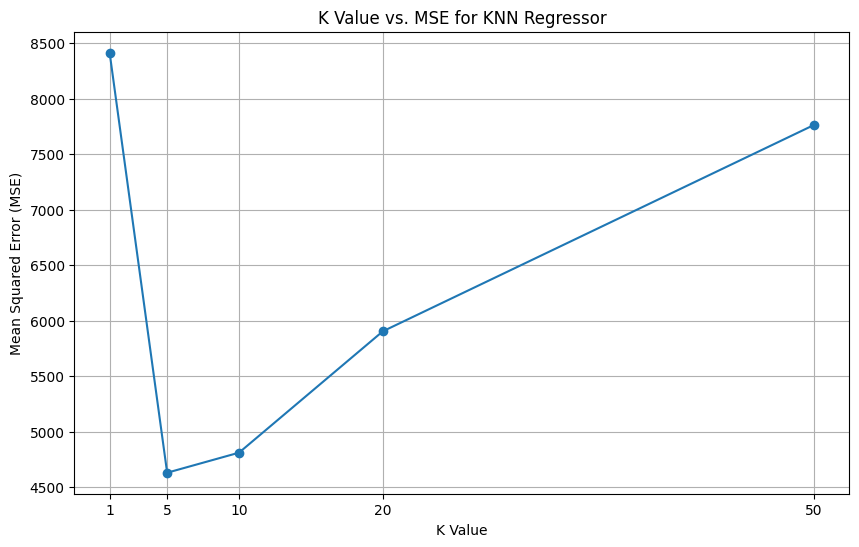


Analysis of K vs. MSE plotted.


In [12]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate a synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Synthetic regression dataset generated and split successfully.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# 2. Train KNN regressors with Euclidean and Manhattan distances (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')

knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)

y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)

mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("\nMean Squared Error (K=5, Euclidean):", mse_euclidean)
print("Mean Squared Error (K=5, Manhattan):", mse_manhattan)

# 3. Test different K values and plot K vs. MSE
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('K Value vs. MSE for KNN Regressor')
plt.xticks(k_values)
plt.grid(True)
plt.show()

print("\nAnalysis of K vs. MSE plotted.")

##**Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data**
**Task:**
**1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).**


In [1]:
import pandas as pd

# Load the Pima Indians Diabetes dataset
df = pd.read_csv('/content/diabetes (1).csv')

print("Pima Indians Diabetes dataset loaded successfully.")
print("First 5 rows of the dataset:")
display(df.head())

Pima Indians Diabetes dataset loaded successfully.
First 5 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
import numpy as np
from sklearn.impute import KNNImputer

# Identify columns with missing values represented as 0
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with NaN in these columns
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

print("Replaced 0 with NaN in specified columns.")
print("\nChecking for missing values after replacement:")
display(df.isnull().sum())

# Apply KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("\nMissing values imputed successfully using KNNImputer.")
print("\nChecking for missing values after imputation:")
display(df_imputed.isnull().sum())

# Separate features (X) and target (y)
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

print("\nFeatures and target separated.")

Replaced 0 with NaN in specified columns.

Checking for missing values after replacement:


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0



Missing values imputed successfully using KNNImputer.

Checking for missing values after imputation:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0



Features and target separated.


In [2]:
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.metrics import accuracy_score
import pandas as pd # Import pandas
import numpy as np # Import numpy
from sklearn.impute import KNNImputer # Import KNNImputer
from sklearn.model_selection import train_test_split # Import train_test_split


# Load the Pima Indians Diabetes dataset (included here)
df = pd.read_csv('/content/diabetes (1).csv')

# Identify columns with missing values represented as 0 (included here)
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

# Apply KNN Imputation (included here)
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Separate features (X) and target (y) (included here)
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# Split the data into training and testing sets (included here)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train KNN using Brute-force
start_time = time.time()
knn_brute = KNeighborsClassifier(algorithm='brute')
knn_brute.fit(X_train, y_train)
end_time = time.time()
brute_time = end_time - start_time

y_pred_brute = knn_brute.predict(X_test)
accuracy_brute = accuracy_score(y_test, y_pred_brute)

print(f"Brute-force KNN training time: {brute_time:.4f} seconds")
print(f"Brute-force KNN accuracy: {accuracy_brute:.4f}")

# Train KNN using KD-Tree
start_time = time.time()
knn_kdtree = KNeighborsClassifier(algorithm='kd_tree')
knn_kdtree.fit(X_train, y_train)
end_time = time.time()
kdtree_time = end_time - start_time

y_pred_kdtree = knn_kdtree.predict(X_test)
accuracy_kdtree = accuracy_score(y_test, y_pred_kdtree)

print(f"KD-Tree KNN training time: {kdtree_time:.4f} seconds")
print(f"KD-Tree KNN accuracy: {accuracy_kdtree:.4f}")

# Train KNN using Ball Tree
start_time = time.time()
knn_balltree = KNeighborsClassifier(algorithm='ball_tree')
knn_balltree.fit(X_train, y_train)
end_time = time.time()
balltree_time = end_time - start_time

y_pred_balltree = knn_balltree.predict(X_test)
accuracy_balltree = accuracy_score(y_test, y_pred_balltree)

print(f"Ball Tree KNN training time: {balltree_time:.4f} seconds")
print(f"Ball Tree KNN accuracy: {accuracy_balltree:.4f}")

Brute-force KNN training time: 0.0035 seconds
Brute-force KNN accuracy: 0.7208
KD-Tree KNN training time: 0.0081 seconds
KD-Tree KNN accuracy: 0.7208
Ball Tree KNN training time: 0.0061 seconds
Ball Tree KNN accuracy: 0.7208


In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split successfully.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Data split successfully.
X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.inspection import permutation_importance
import time
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

# Load the Pima Indians Diabetes dataset
df = pd.read_csv('/content/diabetes (1).csv')

# Identify columns with missing values represented as 0
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

# Apply KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Separate features (X) and target (y)
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN using Brute-force
start_time = time.time()
knn_brute = KNeighborsClassifier(algorithm='brute')
knn_brute.fit(X_train, y_train)
end_time = time.time()
brute_time = end_time - start_time
y_pred_brute = knn_brute.predict(X_test)
accuracy_brute = accuracy_score(y_test, y_pred_brute)
print(f"Brute-force KNN training time: {brute_time:.4f} seconds")
print(f"Brute-force KNN accuracy: {accuracy_brute:.4f}")

# Determine the best performing model
best_knn_model = knn_brute

# Calculate feature importances to find the top 2
result = permutation_importance(best_knn_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()
top_2_features_indices = sorted_idx[-2:]
top_2_feature_names = X.columns[top_2_features_indices]
print(f"Top 2 most important features: {list(top_2_feature_names)}")

# Select the top 2 features for visualization
X_train_top2 = X_train.iloc[:, top_2_features_indices]
X_test_top2 = X_test.iloc[:, top_2_features_indices]

# Train the best performing model again using only the top 2 features
best_knn_model_top2 = KNeighborsClassifier(algorithm=best_knn_model.algorithm)
best_knn_model_top2.fit(X_train_top2, y_train)

# Plot the decision boundary
h = .02 # step size in the mesh
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

x_min, x_max = X_train_top2.iloc[:, 0].min() - 1, X_train_top2.iloc[:, 0].max() + 1
y_min, y_max = X_train_top2.iloc[:, 1].min() - 1, X_train_top2.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = best_knn_model_top2.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train_top2.iloc[:, 0], X_train_top2.iloc[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlabel(top_2_feature_names[0])
plt.ylabel(top_2_feature_names[1])
plt.title("Decision Boundary of KNN Classifier (Top 2 Features)")
plt.show()





Brute-force KNN training time: 0.0101 seconds
Brute-force KNN accuracy: 0.7208
Top 2 most important features: ['Insulin', 'Glucose']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
